In [1]:
##Post modeling EDA should be on the predictions and see how those compare to the original 
# if there are a lot of songs that have the same rating like all the songs have 5, with the probability predicted ratings it gives
#more variety in the songs raitngs results 
# this is happening because we have one rating per track and that ratingi s binary therefore having the preidcted probability ratings intsead it gives more context 
#as to which songs are actually better or not and therefore my recommendations are stronger 

#Make a notebook of which notebooks are needed for this file 

# Post-Modeling EDA for Recommendation System 

In [1]:
#Import relevant packages
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
est = pd.read_csv('df_estimated')
# est.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
est.head(2)

,Unnamed: 0,artist_id,track_id,estimatedrating
0,0,6jJ0s89eD6GaHleKKya26X,4lCv7b86sLynZbXhfScfm2,2.882593
1,1,6jJ0s89eD6GaHleKKya26X,6tS3XVuOyu10897O3ae7bi,2.962649


In [4]:
est.shape

(16265730, 4)

In [23]:
#Check for NA values 
est.isna().sum()

artist_id          0
track_id           0
estimatedrating    0
dtype: int64

In [24]:
#Check how many unique values of each column 
est.nunique()

artist_id           2327
track_id            6990
estimatedrating    76413
dtype: int64

In [25]:
act = pd.read_csv('modelingdata')
act.drop(['Unnamed: 0'], axis=1, inplace=True)
act.head(2)

,artist,artist_id,album,track_name,is_explicit,track_id,danceability,energy,key,loudness,...,genre_electronic,genre_hip hop,genre_house,genre_indie,genre_pop,genre_punk,genre_r&b,genre_rap,genre_rock,genre_soul
0,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,Firework,0,4lCv7b86sLynZbXhfScfm2,0.638,0.826,8,-4.968,...,0,0,0,0,0,0,0,0,0,0
1,Katy Perry,6jJ0s89eD6GaHleKKya26X,Katy Perry - Teenage Dream: The Complete Confe...,California Gurls,0,6tS3XVuOyu10897O3ae7bi,0.791,0.754,0,-3.729,...,0,0,0,0,0,0,0,0,0,0


In [48]:
act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7041 entries, 0 to 7040
Data columns (total 39 columns):
artist              7041 non-null object
artist_id           7041 non-null object
album               7041 non-null object
track_name          7041 non-null object
is_explicit         7041 non-null int64
track_id            7041 non-null object
danceability        7041 non-null float64
energy              7041 non-null float64
key                 7041 non-null int64
loudness            7041 non-null float64
mode                7041 non-null int64
speechiness         7041 non-null float64
acousticness        7041 non-null float64
instrumentalness    7041 non-null float64
liveness            7041 non-null float64
valence             7041 non-null float64
tempo               7041 non-null float64
duration_ms         7041 non-null int64
ratings             7041 non-null int64
decade_1960         7041 non-null int64
decade_1970         7041 non-null int64
decade_1980         7041 non-n

In [26]:
act.isna().sum()

artist              0
artist_id           0
album               0
track_name          0
is_explicit         0
track_id            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
ratings             0
decade_1960         0
decade_1970         0
decade_1980         0
decade_1990         0
decade_2000         0
decade_2010         0
genrecategory       0
genre_acoustic      0
genre_country       0
genre_dance         0
genre_electronic    0
genre_hip hop       0
genre_house         0
genre_indie         0
genre_pop           0
genre_punk          0
genre_r&b           0
genre_rap           0
genre_rock          0
genre_soul          0
dtype: int64

In [27]:
df_inner = act.merge(est, how='inner')

In [29]:
df_inner.head()

,artist,artist_id,album,track_name,is_explicit,track_id,danceability,energy,key,loudness,...,genre_hip hop,genre_house,genre_indie,genre_pop,genre_punk,genre_r&b,genre_rap,genre_rock,genre_soul,estimatedrating
0,OneRepublic,5Pwc4xIPtQLFEnJriah9YJ,Oh My My,Choke,0,5xtliWYBVT4cKo9BtBn43B,0.582,0.607,4,-6.397,...,0,0,0,0,0,0,0,0,0,2.816513
1,Christina Perri,7H55rcKCfwqkyDFH9wpKM6,head or heart,burning gold,0,3YcBWPQumjC7k0HDcsOMXz,0.565,0.673,4,-5.851,...,0,0,0,0,0,0,0,0,0,2.818815
2,Sia,5WUlDfRSoLAfcVSX1WnrxN,1000 Forms Of Fear,Eye of the Needle,0,2ejeiQQcxOONtMDgV2GXSu,0.495,0.700,4,-5.639,...,0,0,0,0,0,0,0,0,0,2.767651
3,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,Halcyon Days,Burn,0,2GgxS8bUT5G25QJTsfSv0R,0.559,0.777,1,-5.031,...,0,0,0,0,0,0,0,0,0,2.836772
4,Ellie Goulding,0X2BH1fck6amBIoJhDVmmJ,Delirium (Deluxe),Army,1,1PzKBUHhyD035EQM9GNMfV,0.425,0.635,11,-7.384,...,0,0,0,0,0,0,0,0,0,2.806922


In [30]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 40 columns):
artist              52 non-null object
artist_id           52 non-null object
album               52 non-null object
track_name          52 non-null object
is_explicit         52 non-null int64
track_id            52 non-null object
danceability        52 non-null float64
energy              52 non-null float64
key                 52 non-null int64
loudness            52 non-null float64
mode                52 non-null int64
speechiness         52 non-null float64
acousticness        52 non-null float64
instrumentalness    52 non-null float64
liveness            52 non-null float64
valence             52 non-null float64
tempo               52 non-null float64
duration_ms         52 non-null int64
ratings             52 non-null int64
decade_1960         52 non-null int64
decade_1970         52 non-null int64
decade_1980         52 non-null int64
decade_1990         52 non-null int64


In [31]:
df_inner.shape

(52, 40)

In [32]:
df_inner.groupby('track_name').mean()['estimatedrating'].sort_values(ascending=False)

track_name
Through Glass                                             3.458569
Liberation (with Cee-Lo)                                  3.420394
Ms. Jackson                                               3.408362
Landed                                                    3.316422
Angst In My Pants                                         3.239669
I'm Your Man                                              3.225619
We Belong                                                 3.040178
Wouldn't It Be Nice - Remastered                          2.919446
Never Giving Up                                           2.843679
Burn                                                      2.836772
burning gold                                              2.818815
Land of 1000 Dances                                       2.817937
Choke                                                     2.816513
Love Never Felt So Good                                   2.812239
Army                                               

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


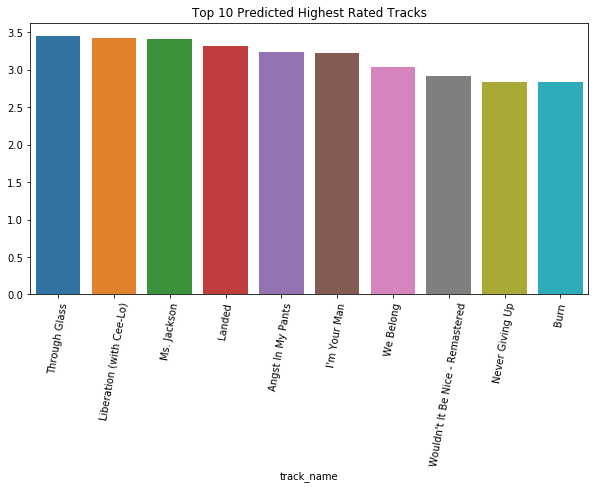

In [34]:
#Plot the top 10 predicted highest rated movies
plt.figure(figsize=(10,5))
topsongs = df_inner.groupby('track_name').mean()['estimatedrating'].sort_values(ascending=False).head(10)
sns.barplot(topsongs.index, topsongs.values)
plt.title('Top 10 Predicted Highest Rated Tracks')
plt.xticks(rotation=80);

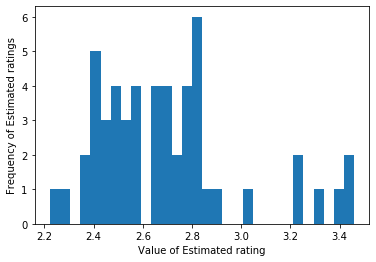

In [35]:
#Plot a histogram of the frequency of certain estimated rating values
plt.hist(df_inner['estimatedrating'],bins=30)
plt.xlabel('Value of Estimated rating')
plt.ylabel('Frequency of Estimated ratings')
plt.show()

In [ ]:
##Below two cells may not be relevant if all trhe values are one - recheck this on full dataset 

In [36]:
df_inner.groupby('track_name').size().sort_values(ascending=False)

track_name
burning gold                                              1
You're Such A                                             1
Landed                                                    1
Land of 1000 Dances                                       1
Keep It Undercover - Theme Song From "K.C. Undercover"    1
June                                                      1
I'm Your Man                                              1
I'm Not The Only One                                      1
Hot Blood                                                 1
Hometown                                                  1
Heartless                                                 1
HandClap                                                  1
Give It Time                                              1
FVR                                                       1
Eye of the Needle                                         1
Drinkin' Too Much                                         1
Demons                       

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


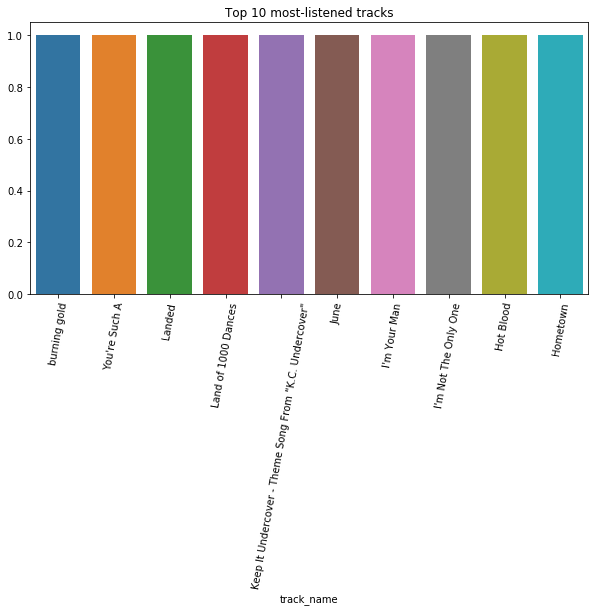

In [39]:

#Plot the top 10 most watched movies
plt.figure(figsize=(10,5))
toptracks = df_inner.groupby('track_name').size().sort_values(ascending=False).head(10)
sns.barplot(toptracks.index, toptracks.values)
plt.title('Top 10 most-listened tracks')
plt.xticks(rotation=80);

In [40]:
df_left = act.merge(est, how='outer')

In [44]:
df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106989 entries, 0 to 106988
Data columns (total 40 columns):
artist              7041 non-null object
artist_id           106989 non-null object
album               7041 non-null object
track_name          7041 non-null object
is_explicit         7041 non-null float64
track_id            106989 non-null object
danceability        7041 non-null float64
energy              7041 non-null float64
key                 7041 non-null float64
loudness            7041 non-null float64
mode                7041 non-null float64
speechiness         7041 non-null float64
acousticness        7041 non-null float64
instrumentalness    7041 non-null float64
liveness            7041 non-null float64
valence             7041 non-null float64
tempo               7041 non-null float64
duration_ms         7041 non-null float64
ratings             7041 non-null float64
decade_1960         7041 non-null float64
decade_1970         7041 non-null float64
decade_1

In [43]:
#Check for. NA values for artist_id and track_id 
df_left[['artist_id', 'track_id']].isna().sum()

artist_id    0
track_id     0
dtype: int64

In [47]:
df_inner['ratings']

0     3
1     2
2     3
3     4
4     3
5     3
6     4
7     4
8     2
9     4
10    3
11    3
12    1
13    2
14    4
15    3
16    4
17    1
18    4
19    5
20    3
21    3
22    2
23    4
24    4
25    4
26    4
27    2
28    2
29    1
30    3
31    2
32    2
33    2
34    2
35    3
36    3
37    2
38    2
39    1
40    5
41    3
42    3
43    3
44    3
45    2
46    2
47    3
48    1
49    2
50    4
51    3
Name: ratings, dtype: int64

In [52]:
df_inner['estimatedrating']

0     2.816513
1     2.818815
2     2.767651
3     2.836772
4     2.806922
5     2.466783
6     2.812239
7     2.434538
8     2.700164
9     2.495232
10    2.416809
11    2.530829
12    2.785849
13    2.575585
14    2.726675
15    2.676483
16    2.702931
17    2.660844
18    2.919446
19    3.408362
20    3.420394
21    2.817937
22    2.584353
23    3.040178
24    2.769278
25    2.425050
26    2.679678
27    2.378279
28    2.765988
29    2.267484
30    2.669048
31    2.222320
32    2.495906
33    2.549581
34    2.536413
35    2.366741
36    2.746428
37    2.411122
38    2.660415
39    2.399880
40    2.664033
41    2.503728
42    3.225619
43    2.506701
44    3.316422
45    2.843679
46    2.571705
47    2.584764
48    2.390036
49    2.433905
50    3.458569
51    3.239669
Name: estimatedrating, dtype: float64

In [53]:
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 40 columns):
artist              52 non-null object
artist_id           52 non-null object
album               52 non-null object
track_name          52 non-null object
is_explicit         52 non-null int64
track_id            52 non-null object
danceability        52 non-null float64
energy              52 non-null float64
key                 52 non-null int64
loudness            52 non-null float64
mode                52 non-null int64
speechiness         52 non-null float64
acousticness        52 non-null float64
instrumentalness    52 non-null float64
liveness            52 non-null float64
valence             52 non-null float64
tempo               52 non-null float64
duration_ms         52 non-null int64
ratings             52 non-null int64
decade_1960         52 non-null int64
decade_1970         52 non-null int64
decade_1980         52 non-null int64
decade_1990         52 non-null int64


In [58]:
matrix = df_inner.drop(['genrecategory', 'is_explicit', 'track_id', 'danceability', 
                  'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 
                  'duration_ms', 'ratings', 'decade_1960', 'decade_1970', 
                  'decade_1980', 'decade_1990', 'decade_2000', 'decade_2010', 
                  'artist_id', 'artist', 'album', 'estimatedrating'], axis=1)

In [59]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 14 columns):
track_name          52 non-null object
genre_acoustic      52 non-null int64
genre_country       52 non-null int64
genre_dance         52 non-null int64
genre_electronic    52 non-null int64
genre_hip hop       52 non-null int64
genre_house         52 non-null int64
genre_indie         52 non-null int64
genre_pop           52 non-null int64
genre_punk          52 non-null int64
genre_r&b           52 non-null int64
genre_rap           52 non-null int64
genre_rock          52 non-null int64
genre_soul          52 non-null int64
dtypes: int64(13), object(1)
memory usage: 6.1+ KB


In [61]:
# #Create a loop that will plot the top 10 most watched movies.  
# for gen in matrix.columns[1:]:
#     x = matrix[(matrix[gen]==True)]
#     plt.figure(figsize=(8,8))
#     topsongs = x.groupby('track_name').size().sort_values(ascending=False).head(2)
#     sns.barplot(topsongs.index, topsongs.values)
#     plt.title('Top 10 most-listened '+gen[6:]+' tracks')
#     plt.xticks(rotation=80);

/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: min() arg is an empty sequence

<Figure size 576x576 with 0 Axes>

In [66]:
matrix2 = df_inner.drop(['genrecategory', 'is_explicit', 'track_id', 'danceability', 
                  'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence', 'tempo', 
                  'duration_ms', 'ratings', 'decade_1960', 'decade_1970', 
                  'decade_1980', 'decade_1990', 'decade_2000', 'decade_2010', 
                  'artist_id', 'artist', 'album'], axis=1)

In [70]:
matrix2.head(2)

,track_name,genre_acoustic,genre_country,genre_dance,genre_electronic,genre_hip hop,genre_house,genre_indie,genre_pop,genre_punk,genre_r&b,genre_rap,genre_rock,genre_soul,estimatedrating
0,Choke,0,0,1,0,0,0,0,0,0,0,0,0,0,2.816513
1,burning gold,0,0,1,0,0,0,0,0,0,0,0,0,0,2.818815


/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/adinasteinman/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an

ValueError: min() arg is an empty sequence

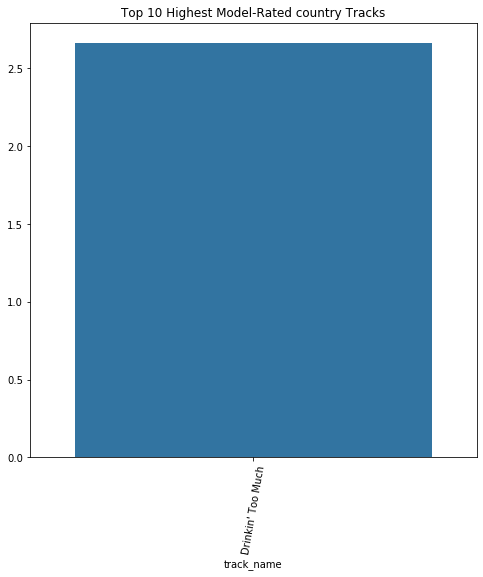

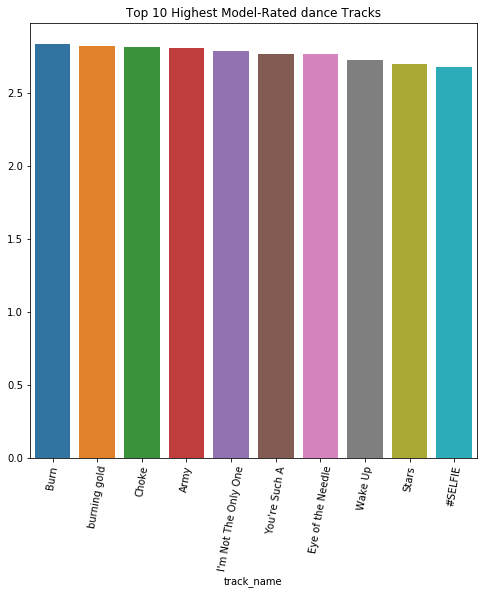

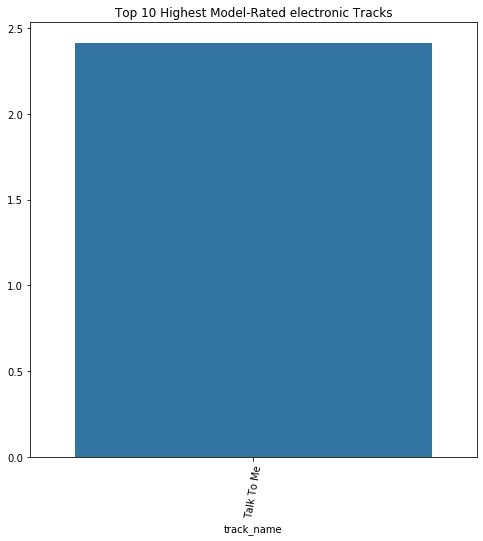

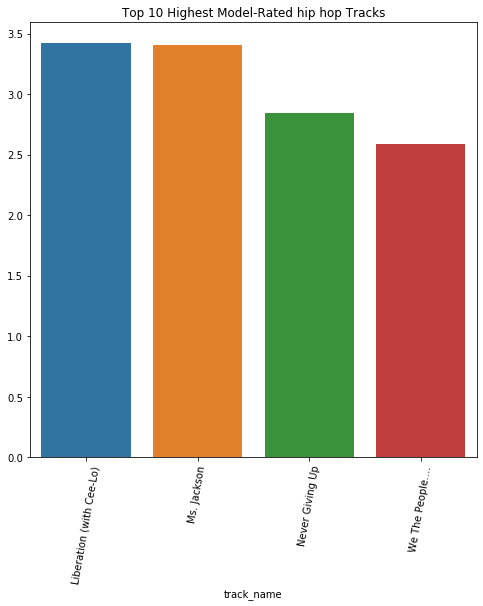

<Figure size 576x576 with 0 Axes>

In [72]:
for gen in matrix2.columns[2:]:
    x = matrix2[(matrix2[gen]==True)]
    plt.figure(figsize=(8,8))
    topsongs = x.groupby('track_name').mean()['estimatedrating'].sort_values(ascending=False).head(10)
    sns.barplot(topsongs.index, topsongs.values)
    plt.title('Top 10 Highest Model-Rated '+gen[6:]+' Tracks')
    plt.xticks(rotation=80);

In [ ]:
##Any other post-model EDA to add? 